July 6, 2025 12:40pm start time  
Jennifer Yoon author  
### Augmented Data functions build  

Read-in one sample .mat data  
Plot original data  
Do Augmentation function, plot each time  

Assemble comginations of augmentations  
Build separate? or another script to run without outputs.  
Batch process whole folder path, output to different path  

In [3]:
# Mount Google Drive to Colab instance
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Imports, short list for now

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.io
import os

#import math
#import time


In [16]:
# Upload data files, print directory content on Colab
!ls

# Read .mat file, 125 hertz, millivolts (downsampled)
filename = "HR00001.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
print(mat_data, type(mat_data))

# Check the keys in the loaded data
print(mat_data.keys())  # only one key, 'val'.

# Access the struct (assuming the variable is named 'myStruct')
data = mat_data['val']

# Show elements of data (ndarray type)
print('last 6 elements Vs: \n', data[-6:])
print('length of row 0:', len(data[0]))

drive	     HR00001.mat  HR00002.mat  vscode_plot.png
HR00001.hea  HR00002.hea  sample_data
{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Jun 26 18:46:44 2025', '__version__': '1.0', '__globals__': [], 'val': array([[-0.115, -0.115, -0.109, ...,  0.21 ,  0.21 ,  0.21 ],
       [-0.05 , -0.05 , -0.048, ...,  0.205,  0.205,  0.205],
       [ 0.065,  0.065,  0.061, ..., -0.005, -0.005, -0.005],
       ...,
       [-0.035, -0.035, -0.03 , ...,  0.185,  0.185,  0.185],
       [-0.035, -0.035, -0.029, ...,  0.17 ,  0.17 ,  0.17 ],
       [-0.075, -0.075, -0.069, ...,  0.18 ,  0.18 ,  0.18 ]])} <class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'val'])
last 6 elements Vs: 
 [[-0.065 -0.065 -0.059 ...  0.075  0.075  0.075]
 [-0.04  -0.04  -0.035 ...  0.225  0.225  0.225]
 [-0.005 -0.005 -0.005 ...  0.175  0.175  0.175]
 [-0.035 -0.035 -0.03  ...  0.185  0.185  0.185]
 [-0.035 -0.035 -0.029 ...  0.17   0.17   0.17 ]
 [-0.075 -0.075 -0.069 ...  0.18   0.

In [ ]:
# Plot all 12 signals
plt.figure(figsize=(12, 8))

for i in range(num):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=ecg_labels[i])
    # Offset each signal for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Downsampled Signals (125 Hz)")
plt.legend()
plt.show()

In [18]:
# leadeslist. ecg data is always in this lead order.
leads = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF',
         'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

[0, 1, 10, 11]


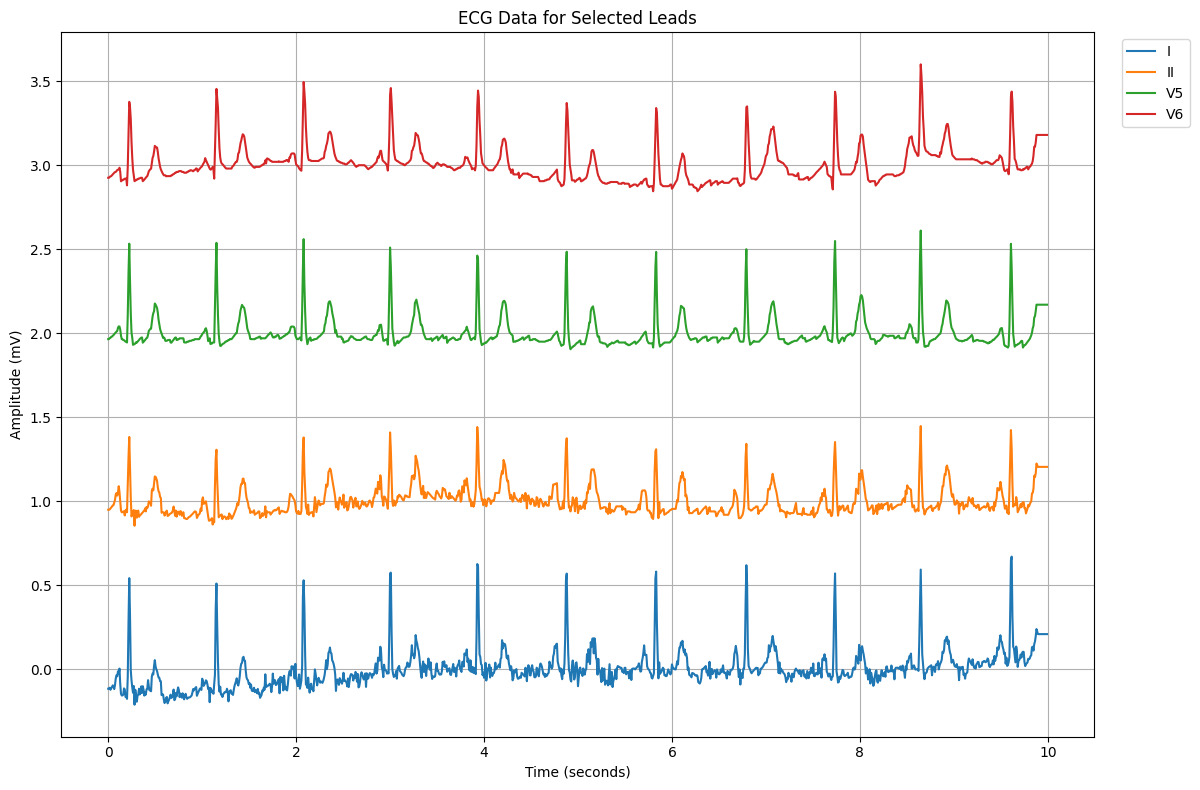

In [57]:
# Assuming 'data' is your 12x1250 numpy array from the .mat file
# Assuming 'leads' is your list of lead names in the correct order

leads_plot = ['I', 'II', 'V5', 'V6'] # Example list of leads to plot

# Get the indices of the leads to plot
indices_to_plot = [leads.index(lead) for lead in leads_plot]
print(indices_to_plot)

# Select the data for the chosen leads
data_to_plot = data[indices_to_plot, :]

# Create a time vector (assuming 125 Hz sampling frequency)
sampling_frequency = 125  # Hz
time = np.arange(data_to_plot.shape[1]) / sampling_frequency

# Plot the selected signals
plt.figure(figsize=(12, 8))

for i, index in enumerate(indices_to_plot):
    plt.plot(time, data_to_plot[i] + i * 1, label=leads[index]) # Offset for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Data for Selected Leads")
# legend location edit
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.grid(True)
plt.tight_layout()
plt.savefig('ECG_I_II_V5_V6.png')
plt.show()

[6, 7, 8, 9]


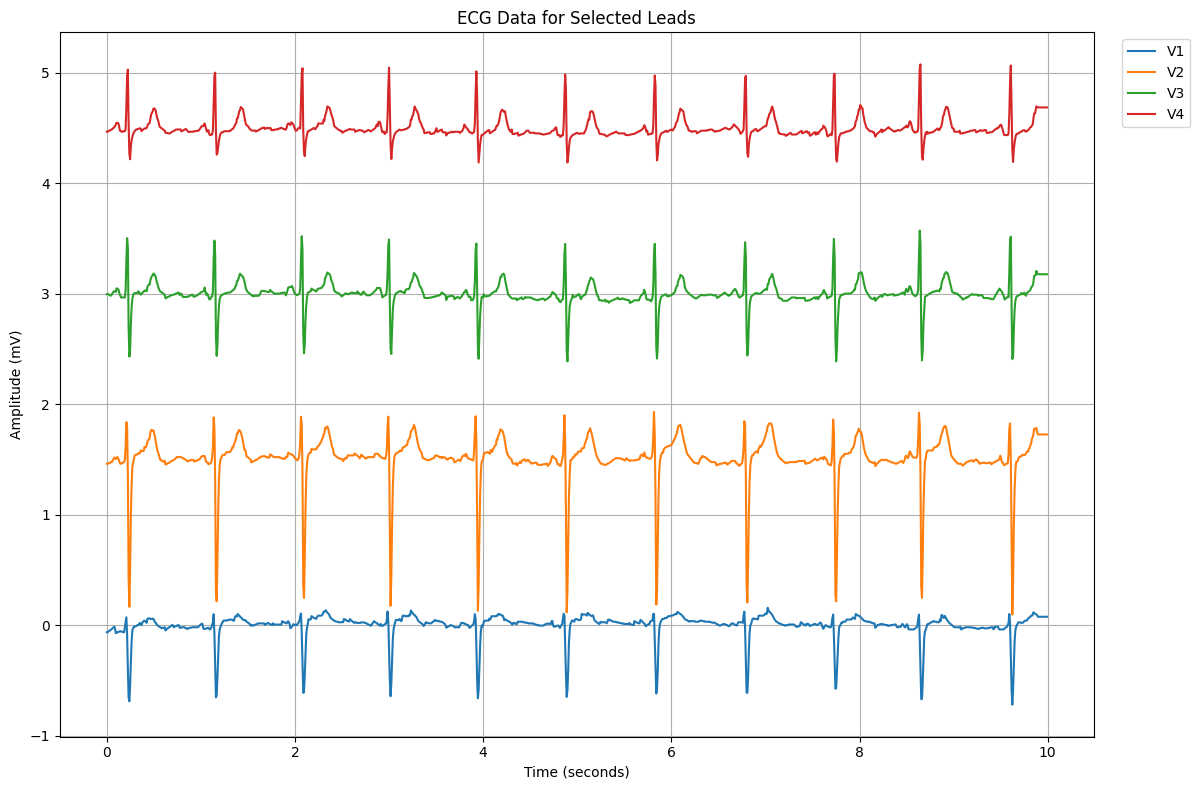

In [56]:
# Copied cell, to have 2nd plot option.
# Assuming 'data' is your 12x1250 numpy array from the .mat file
# Assuming 'leads' is your list of lead names in the correct order

leads_plot = ['V1', 'V2', 'V3', 'V4'] # Example list of leads to plot

# Get the indices of the leads to plot
indices_to_plot = [leads.index(lead) for lead in leads_plot]
print(indices_to_plot)

# Select the data for the chosen leads
data_to_plot = data[indices_to_plot, :]

# Create a time vector (assuming 125 Hz sampling frequency)
sampling_frequency = 125  # Hz
time = np.arange(data_to_plot.shape[1]) / sampling_frequency

# Plot the selected signals
plt.figure(figsize=(12, 8))

for i, index in enumerate(indices_to_plot):
    plt.plot(time, data_to_plot[i] + i * 1.5, label=leads[index]) # Offset for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Data for Selected Leads")
# legend location edit
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.grid(True)
plt.tight_layout()
plt.savefig('ECG_V1_to_V4.png')
plt.show()

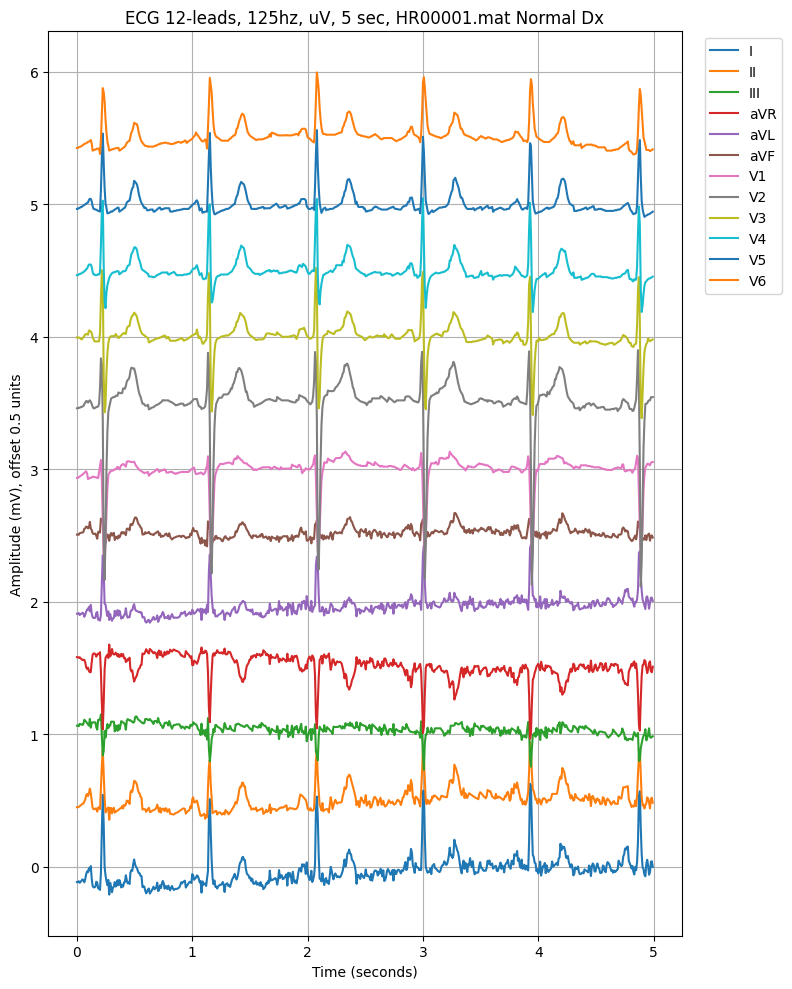

In [46]:
# Assuming 'data' is your 12x1250 numpy array and 'sampling_frequency' is 125 Hz

# Calculate the number of samples for 5 seconds
samples_to_plot = int(5 * sampling_frequency)

# Select the data for all 12 leads and the first 5 seconds
data_to_plot_all = data[:, :samples_to_plot]

# Create a time vector for the first 5 seconds
time_all = np.arange(samples_to_plot) / sampling_frequency

# Plot all 12 signals for the first 5 seconds
plt.figure(figsize=(8, 10)) # Increased height to 16, width remains 12

for i in range(data_to_plot_all.shape[0]):
    plt.plot(time_all, data_to_plot_all[i] + i * 0.5, label=leads[i]) # Offset for clarity, half unit shift up.

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV), offset 0.5 units")
plt.title("ECG 12-leads, 125hz, uV, 5 sec, HR00001.mat Normal Dx") # Added details to title
plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1.0), fontsize='medium') # Increased font size and adjusted legend position
plt.grid(True)
plt.tight_layout()
plt.savefig('ECG_12lead_HR00001_Normal.png')
plt.show()